In [1]:
#Caso Práctico 2:

In [2]:
#Librerias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#1)Bajar el dataset winequality-white para trabajar en la siguiente práctica:
data = pd.read_csv("winequality-white.csv", sep=";")

In [4]:
#2) Obtener las estadístias descriptivas: data.describe():

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


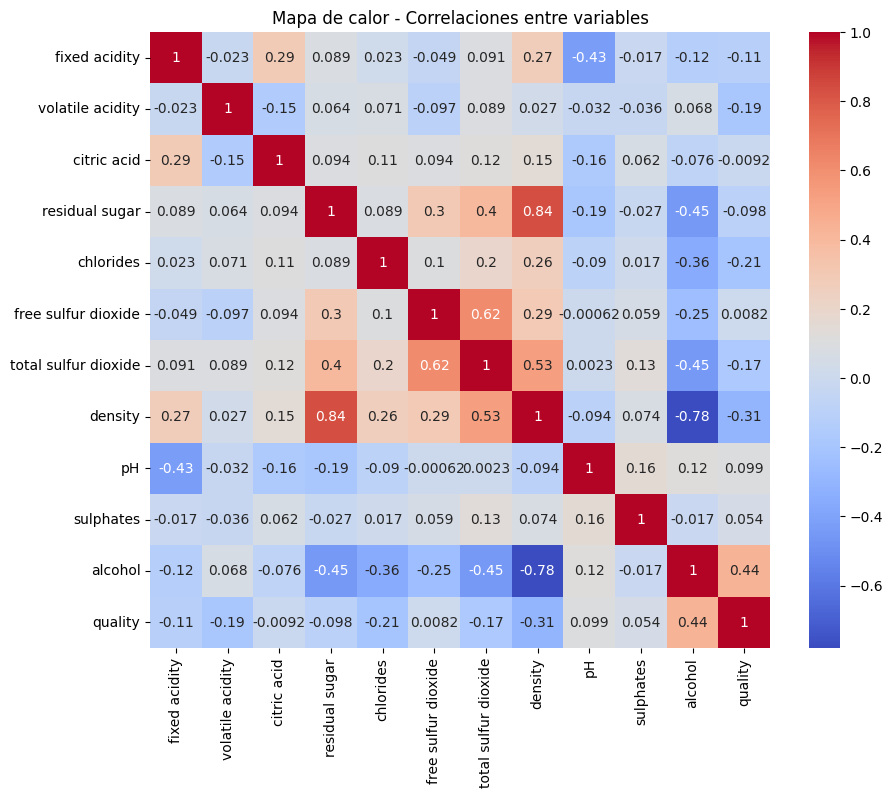

In [5]:
#3) Obtener la correlación entre las características: sns.heatmap()
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor - Correlaciones entre variables")
plt.show()

In [9]:
#4) Entrenar a través del modelo RandomForest buscando el mejor
#modelo a través de RandomSearchCV():

# Librerías:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Para guardar el modelo


In [29]:
#Preparación de Datos:

# Como queremos predecir la calidad del vino, entonces crearemos una
# columna extra en el dataset y la llamaremos "quality_cat", donde se realizará
# la clasificación categórica de la calidad del vino:

data['quality_cat']=data['quality'].apply(lambda x: 'mala' if x<= 4
                                          else 'media' if x <= 6 else 'buena')

# Hacemos que X tome todas las variables, excepto las relacionadas con quality
# ya que esa es la variable que deseamos predecir:

X = data.drop(['quality','quality_cat'], axis=1)
print(X.head())

#Definimos y (la variable que deseamos predecir, en este caso, la calidad
#del vino):

y= data['quality_cat']

#Normalizamos los datos para que cada columna tenga media=0 y desviación
#estándar igual a 1.Cambia los valores de cada variable para que tengan
#la misma escala, sin cambiar su distribución general.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled)

#Dividimos los datos entre datos de prueba y datos de entrenamiento:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


In [11]:
# Parámetros para la validación cruzada:
param_dist = {
    'n_estimators': [50,100,200,300],  # Opciones de número de árboles en el bosque
    'max_depth': [None, 5, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10, 20],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 6]  # Mínimo de muestras en una hoja
}

In [12]:
# Configurar RandomSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                           n_iter = 10, cv=5, n_jobs=-1, random_state = 42)

In [36]:
#Entrenar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)
print("Mejores parámetros:", random_search.best_params_)
print("Mejor precisión en validación", random_search.best_score_)

best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Precisión en test:", test_score)
print(type(best_model))


Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Mejor precisión en validación 0.8205684572679646
Precisión en test: 0.8367346938775511
<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [34]:
#Realizar predicciones:
y_pred = best_model.predict(X_test)
print(type(X_test))
print(X_test[0,:])
print(y_pred[0])

<class 'numpy.ndarray'>
[-1.01304317  0.11667379  0.6264779   0.86927938  0.10197156  1.15798004
  0.25037443 -0.10946844 -0.6508363   0.87765711  0.36765663]
buena


In [31]:
#Guardar predicciones en un CSV:
#Crear un DataFrame con los resultados:

resultados = pd.DataFrame({"Real":y_test, "Predicción":y_pred})

#Guardar en un archivo CSV:
resultados.to_csv("predicciones_winequality-white.csv",index=False)
print("Archivo 'predicciones_winequality-white.csv' guardado correctamente")
from google.colab import files
files.download("predicciones_winequality-white.csv")

Archivo 'predicciones_winequality-white.csv' guardado correctamente


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
#Guardar modelo entrenado:
import pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(best_model, f)
from google.colab import files
files.download('modelo.pkl')
#Para cargarlo después y hacer predicciones sin tener que entrenarlo de nuevo:
modelo_cargado = joblib.load("modelo.pkl")
nuevas_predicciones = modelo_cargado.predict(X_test)
print(type(modelo_cargado))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
